In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data();

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# y_train = to_categorical(y_train, 10)
# y_test = to_categorical(y_test, 10)

In [ ]:
model_cnn = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model_cnn.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 29ms/step - accuracy: 0.8986 - loss: 0.3217 - val_accuracy: 0.9860 - val_loss: 0.0441
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 27ms/step - accuracy: 0.9864 - loss: 0.0458 - val_accuracy: 0.9880 - val_loss: 0.0342
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.9909 - loss: 0.0293 - val_accuracy: 0.9897 - val_loss: 0.0290
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9926 - loss: 0.0230 - val_accuracy: 0.9913 - val_loss: 0.0282
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9932 - loss: 0.0199 - val_accuracy: 0.9902 - val_loss: 0.0331
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.9950 - loss: 0.0154 - val_accuracy: 0.9916 - val_loss: 0.0276
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 28ms/step - accuracy: 0.9963 - loss: 0.0115 - val_accuracy: 0.9915 - val_loss: 0.0302
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9960 -

In [ ]:
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"CNN Test Accuracy : {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9880 - loss: 0.0441
CNN Test Accuracy : 0.9915000200271606


In [ ]:
model_cnn.save("digit_classifier.h5")

# Multidigit

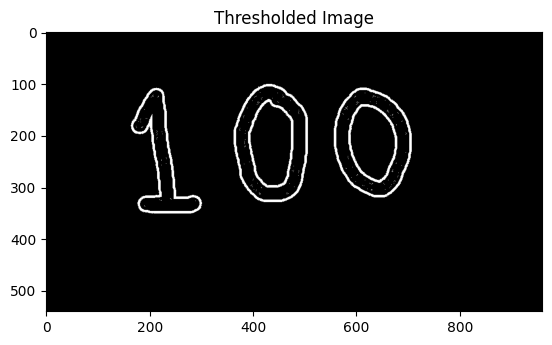

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "test.jpg"
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded Image")
plt.show()

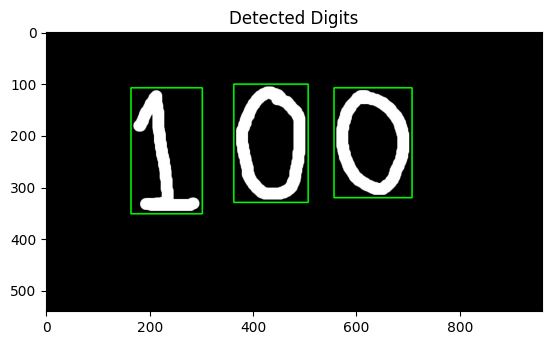

In [ ]:
# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours from left to right
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# Draw bounding boxes to check detection
img_copy = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show detected digits with bounding boxes
plt.imshow(img_copy)
plt.title("Detected Digits")
plt.show()

In [ ]:
digit_images = []
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    digit = thresh[y:y+h, x:x+w]

    # Resize to match CNN input (28x28)
    digit = cv2.resize(digit, (28, 28))

    # Normalize and add channel dimension
    digit = digit / 255.0
    digit = np.expand_dims(digit, axis=-1)

    digit_images.append(digit)

# Convert to numpy array
digit_images = np.array(digit_images)

print(f"Extracted {len(digit_images)} digits")

Extracted 3 digits


In [ ]:
from tensorflow.keras.models import load_model

model = load_model("digit_classifier.h5")

predictions = [np.argmax(model.predict(d.reshape(1, 28, 28, 1))) for d in digit_images]
predicted_number = "".join(map(str, predictions))

print(f"Predicted Number: {predicted_number}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
Predicted Number: 100
